# 6.6 Sourcing & Analyzing Time-Series Data 

### This script contains the following:

#### 1. Importing your libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Stationarizing the Federal Reserve Economic Data

### 1. Importing your libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api to import the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # Library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature.

plt.style.use('fivethirtyeight') # Styling option for how your plots will appear.

In [2]:
# Configure API key 

quandl.ApiConfig.api_key = 'AGMzEBttohNDUs8xB4DZ'

In [3]:
# Importing the Federal Reserve Economic Data "Natural Rate of Unemployment" variable.

data = quandl.get('FRED/NROU')

In [4]:
data.head(5)

,Value
Date,
1949-01-01,5.255053
1949-04-01,5.261516
1949-07-01,5.268013
1949-10-01,5.274564
1950-01-01,5.281182


In [5]:
data.tail(5)

,Value
Date,
2030-10-01,4.294982
2031-01-01,4.289282
2031-04-01,4.283630
2031-07-01,4.278029
2031-10-01,4.272470


#### Our Data set time period is from 1949 - 2031. Two things - first we need to correspond and relate the data on unemployment to our student COVID-19 impact on th US project and second we need to make sure that we remove any forecasiting from our source data set. 

In [6]:
data.shape

(332, 1)

In [7]:
data.columns

Index(['Value'], dtype='object')

In [8]:
type(data)

pandas.core.frame.DataFrame

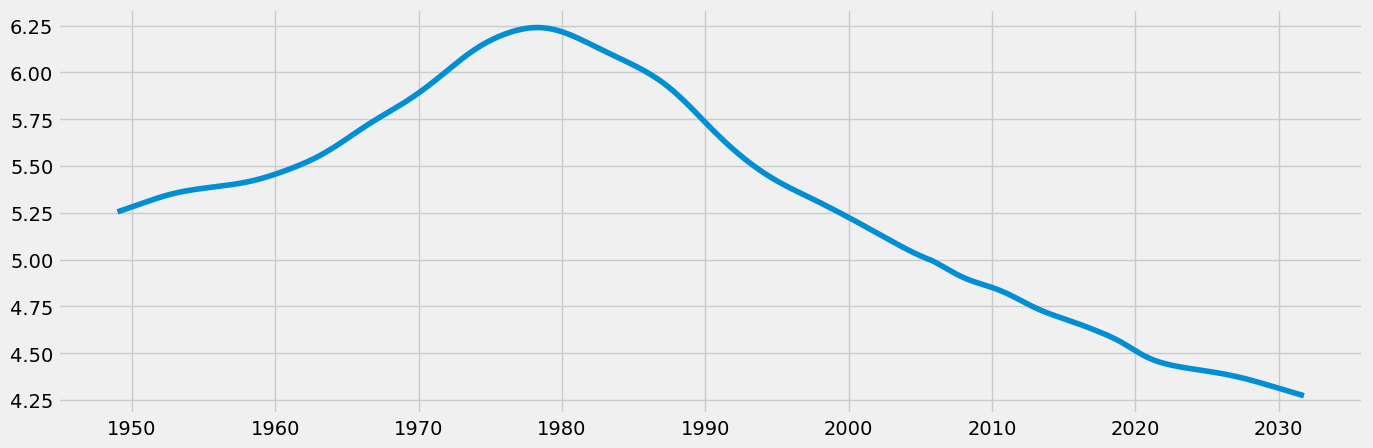

In [9]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(data)

### 2. Subsetting, wrangling, and cleaning time-series data

In [10]:
# Reset index to use the "Date" column as a filter

data_2 = data.reset_index()

In [11]:
# Confirm index reset

data_2.head()

,Date,Value
0,1949-01-01,5.255053
1,1949-04-01,5.261516
2,1949-07-01,5.268013
3,1949-10-01,5.274564
4,1950-01-01,5.281182


In [13]:
# Subset date to only includes a time period relating to our Student COVID-19 project and the impact of the virus on unemployment. 

data_sub = data_2.loc[(data_2['Date'] >= '2015-01-01') & (data_2['Date'] < '2021-01-01')]

In [14]:
# Check shape after Subsetting

data_sub.shape

(24, 2)

In [15]:
# Check time frame values

data_sub.head()

,Date,Value
264,2015-01-01,4.683832
265,2015-04-01,4.677328
266,2015-07-01,4.670775
267,2015-10-01,4.664107
268,2016-01-01,4.657280


In [16]:
# Check time frame values

data_sub.tail()

,Date,Value
283,2019-10-01,4.524682
284,2020-01-01,4.512876
285,2020-04-01,4.501435
286,2020-07-01,4.490658
287,2020-10-01,4.480756


In [17]:
# Set the "Date" column as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Date']) # Create a datetime column from "Date.""
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
data_sub.head()

,Value
datetime,
2015-01-01,4.683832
2015-04-01,4.677328
2015-07-01,4.670775
2015-10-01,4.664107
2016-01-01,4.657280


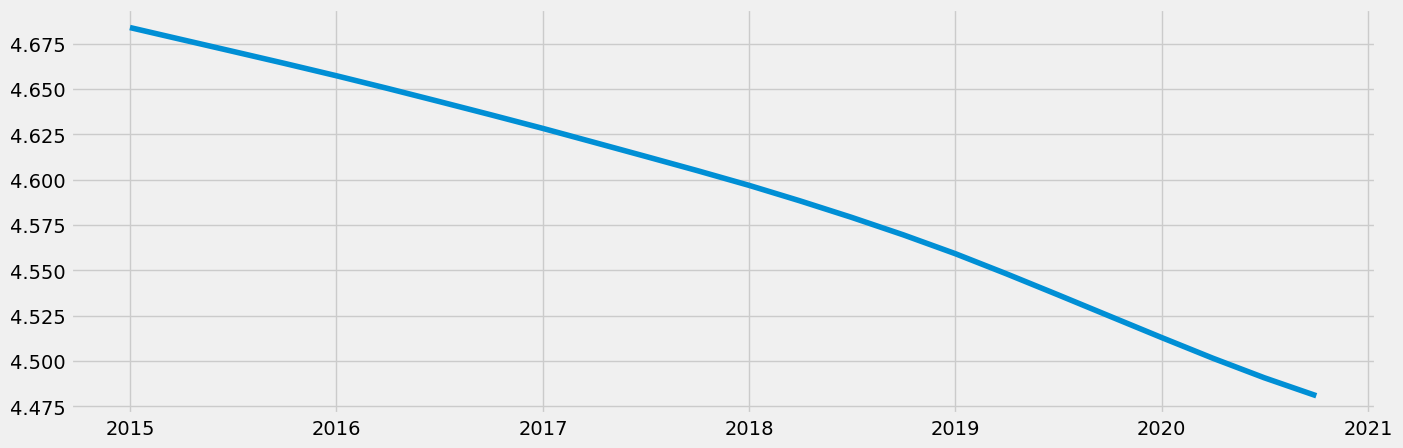

In [18]:
# Plot the new data set (after subsetting)

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

#### I chose to create a subset this data to includes a time period relating to our Student COVID-19 project and the impact of the virus on unemployment with time period being 2015-01-01 to 2021-01-01.

In [19]:
# Check for missing values (None noted)

data_sub.isnull().sum() 

Value    0
dtype: int64

In [20]:
# Check for duplicates

dups = data_sub.duplicated()
dups.sum()

# No duplicates noted

0

### 3. Time-series analysis: decomposition 

In [21]:
# Decompose the time series using an additive model - Additive due to the lack of exponential growth and more linear growth pattern noted in our dataset.

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [22]:
from pylab import rcParams # Define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

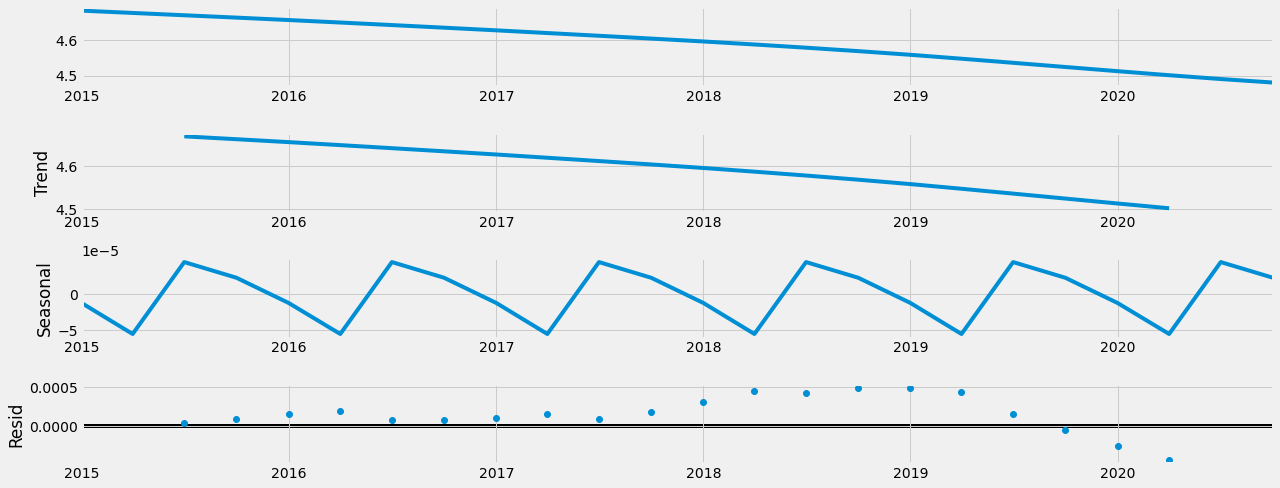

In [23]:
# Plot the decomposition components - Residual = Noise

decomposition.plot()
plt.show()

#### As the level and trend are fairly consistent, smoothing was not required. The trend component does not displays fluctuations over the years starting around 2015 to 2021. The seasonality component displays fluctuations indicating season fluctuations at a regular interval. The residual shows that there isn't too much unexplained noise with a few deviations around late 2019 into 2020 which represent downward trends on the line chart. Overall, there appears to be a dominant  downward trend, seasonality is present, and there appears to be minimal residual noise left over. As seasonality is present and a trend noted, we need to check for stationarity and autocorrelation to ensure a time series forcasting plot can be made.

### 4. Testing for stationarity

In [24]:
# Use adfuller() function to import from the model of statsmodels for the test that will produce an array so we then
# Define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                 -2.503314
p-value                         0.114670
Number of Lags Used             9.000000
Number of Observations Used    14.000000
Critical Value (1%)            -4.012034
Critical Value (5%)            -3.104184
Critical Value (10%)           -2.690987
dtype: float64


#### The test statistic is -2.5 and the p-value is 0.11 which indicates the test result is not significant as it is more than 0.05. Using the critical value (5%) which is -3.1, it is much smaller than the test statistic. This means you cannot reject the null hypothesis indicating that "there is a unit root" in the data and therefore the data is likely non-stationary.

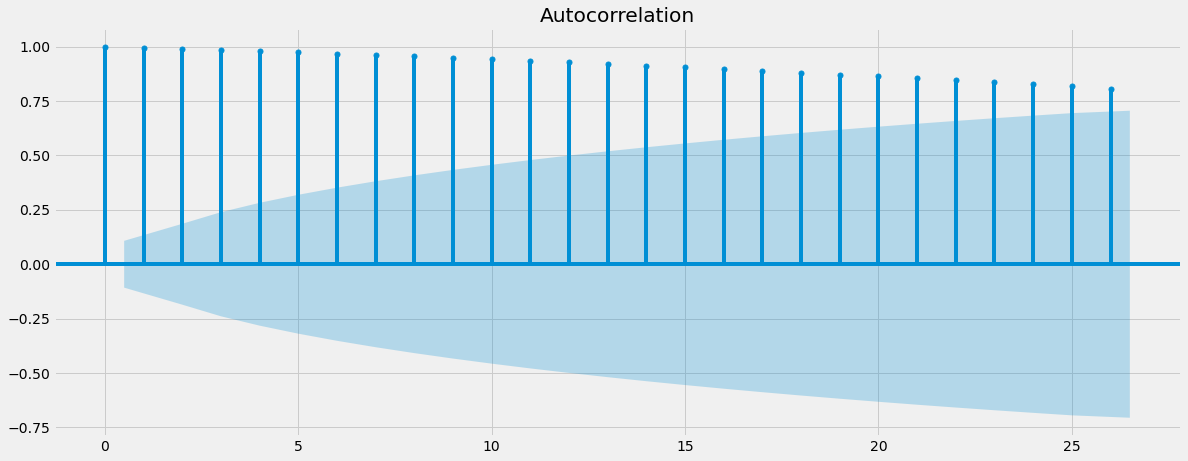

In [25]:
# Plot autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(data)
plt.show()

#### The autocorrelation shows that there are multiple lags beyond the confidence interval likely indicating the data is non-stationary and autocorrelated confirming the Dickey-Fuller test to show that of a non-stationary dataset. 

### 5. Stationarizing the Federal Reserve Economic Data 

In [29]:
data_diff = data_sub - data_sub.shift(1)

# The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [30]:
# Remove any missing values

data_diff.dropna(inplace = True)

In [31]:
# Display dataframe

data_diff.head()

,Value
datetime,
2015-04-01,-0.006503
2015-07-01,-0.006554
2015-10-01,-0.006667
2016-01-01,-0.006827
2016-04-01,-0.007013


In [33]:
# Display column information

data_diff.columns

Index(['Value'], dtype='object')

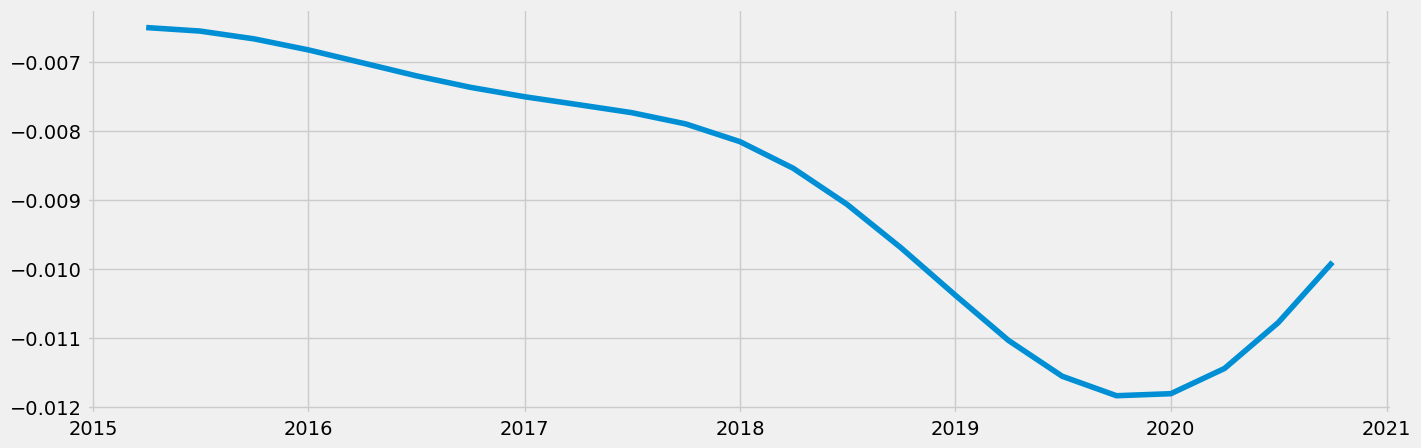

In [34]:
# Display time series with differencing

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [35]:
# Re-perform Dickey-Fuller test after differencing

dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -5.193424
p-value                         0.000009
Number of Lags Used             8.000000
Number of Observations Used    14.000000
Critical Value (1%)            -4.012034
Critical Value (5%)            -3.104184
Critical Value (10%)           -2.690987
dtype: float64


#### After differencing, the test-statistic (-5.2) is now smaller than the critical values at 5% (-3.1) and at 10% (-2.7) this the null hypothesis can be rejected (no unit root present) resulting the data to be stationary. The test result is also significant as the p-value is less than 0.05 at 0.000.

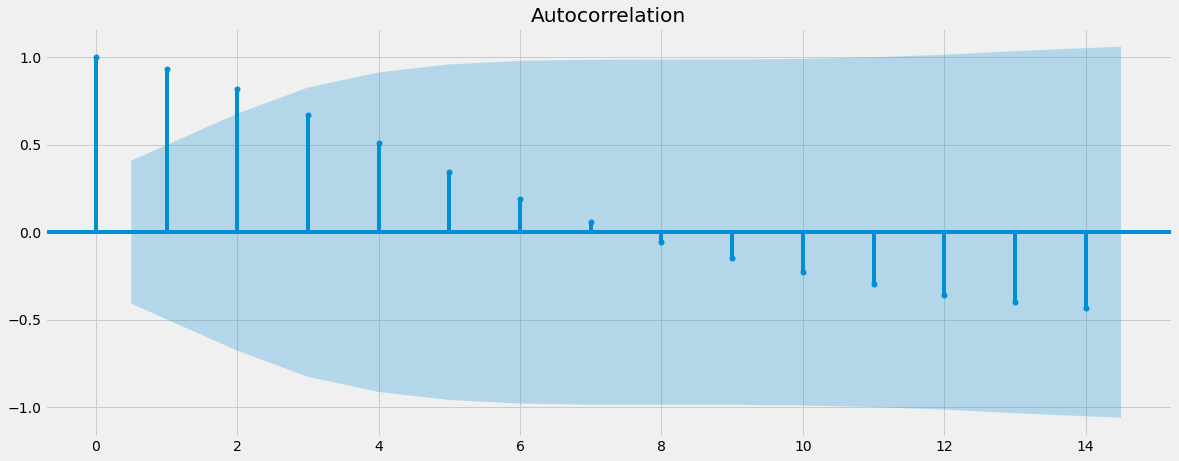

In [36]:
# Display autocorrelation

plot_acf(data_diff)
plt.show()

#### The autocorrelation shows a far greater reduction in lag points with only 3 points beyond confidence interval. A second round of differencing is not necessary because of the unspoken rule of thumb that you need at least ten significant lags (or ten vertical lines above the confidence interval) for a second round of differencing to be necessary.